In [1]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('image.jpg')

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [5]:
from sklearn.cluster import KMeans
k = 3

In [6]:
clf = KMeans(n_clusters = k, n_jobs=4)

In [7]:
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = clf.labels_

In [9]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [10]:
label = [0] * k

In [11]:
for i in labels:
    label[i] += 1

In [12]:
label

[366816, 193957, 58155]

In [13]:
label = [float(x)/ sum(label) * 100 for x in label]

In [14]:
label

[59.2663443890081, 31.337570767520617, 9.396084843471291]

In [15]:
color = clf.cluster_centers_

In [16]:
color

array([[  22.43918902,   21.90827306,   20.96791588],
       [ 254.18388612,  254.18080296,  254.17905   ],
       [ 177.66351412,  155.04539671,   90.56219693]])

In [17]:
color = [ [int(x) for x in c ] for c in color]

In [18]:
color

[[22, 21, 20], [254, 254, 254], [177, 155, 90]]

In [19]:
import webcolors

In [20]:
color = [webcolors.rgb_to_hex(x) for x in color]

In [21]:
import matplotlib.pyplot as plt

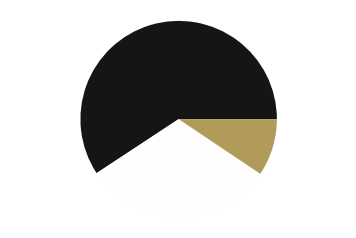

In [22]:
plt.pie(label, colors = color)
plt.axis('equal')
plt.show()

In [23]:
# Importing All the 10 images, applying clustering and extracting color & labels
k = 3
image = []
colorTriple = []
color = []
label = []
for i in range(10):
    name = 'Dominant Color Data Set/image '+ str(i+1) +'.jpg'
    image.append(cv2.imread(name))
    image[i] = cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB)
    image[i] = image[i].reshape((image[i].shape[0] * image[i].shape[1]), 3)
    clf = KMeans(n_clusters = k, n_jobs=4)
    clf.fit(image[i])
    labels = clf.labels_
    label.append([0] * k)
    for x in labels: label[i][x] += 1
    label[i] = [float(x)/ sum(label[i]) * 100 for x in label[i]]
    color.append(clf.cluster_centers_)
    color[i] = [[int(j) for j in x] for x in color[i]]
    colorTriple.append(color[i])
    color[i] = [webcolors.rgb_to_hex(x) for x in color[i]]

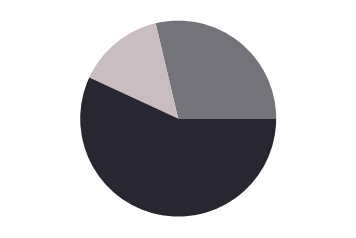

In [24]:
plt.pie(label[7], colors = color[7])
plt.axis('equal')
plt.show()

In [25]:
color

[['#a6595c', '#d9d4d0', '#30325b'],
 ['#2f3022', '#d6cbc7', '#70624d'],
 ['#fbfaf8', '#5c4c47', '#d8b59c'],
 ['#261b20', '#8c8688', '#6c484e'],
 ['#c1a093', '#322b2c', '#fbfbfa'],
 ['#f0efee', '#12162d', '#c18f78'],
 ['#edeaeb', '#1f1f1b', '#d0a07f'],
 ['#74737a', '#c9bdc1', '#282731'],
 ['#2c2d40', '#f0f0f0', '#c4afaa'],
 ['#852e34', '#9a9192', '#471215']]

In [26]:
# This could have been best way but all the hex value don't contain name associated with it.
webcolors.hex_to_name('#30325b')

ValueError: '#30325b' has no defined color name in css3

In [27]:
colortrip = [j for i in colorTriple for j in i]
colortrip

[[166, 89, 92],
 [217, 212, 208],
 [48, 50, 91],
 [47, 48, 34],
 [214, 203, 199],
 [112, 98, 77],
 [251, 250, 248],
 [92, 76, 71],
 [216, 181, 156],
 [38, 27, 32],
 [140, 134, 136],
 [108, 72, 78],
 [193, 160, 147],
 [50, 43, 44],
 [251, 251, 250],
 [240, 239, 238],
 [18, 22, 45],
 [193, 143, 120],
 [237, 234, 235],
 [31, 31, 27],
 [208, 160, 127],
 [116, 115, 122],
 [201, 189, 193],
 [40, 39, 49],
 [44, 45, 64],
 [240, 240, 240],
 [196, 175, 170],
 [133, 46, 52],
 [154, 145, 146],
 [71, 18, 21]]

In [28]:
label = [j for i in label for j in i]
label

[23.219401041666668,
 29.593098958333336,
 47.1875,
 57.5537109375,
 27.477864583333332,
 14.968424479166668,
 67.9765625,
 15.201497395833332,
 16.821940104166664,
 22.039713541666668,
 63.069661458333336,
 14.890624999999998,
 9.6064453125,
 31.126627604166668,
 59.26692708333333,
 71.4814453125,
 23.8154296875,
 4.703125,
 65.16243489583333,
 25.804361979166668,
 9.033203125,
 28.698893229166668,
 14.411458333333332,
 56.88964843749999,
 58.611979166666664,
 32.069986979166664,
 9.318033854166668,
 48.77571614583333,
 21.621419270833332,
 29.602864583333332]

In [29]:
colors = [['Black', [0,0,0]],
 ['Blue', [0,0,255]],
 ['Brown', [165,42,42]],    
 ['Cream', [255,255,204]],   
 ['Green',  [0,128,0]],        
 ['Grey',   [128,128,128]],
 ['Yellow', [255,255,0]],
 ['Orange', [255,165,0]],          
 ['Pink', [255,192,203]], 
 ['Red', [255,0,0]],  
 ['Purple', [128,0,128]],
 ['Tan', [210,180,140]],
 ['Turquoise', [64,224,208]],
 ['White', [255,255,255]]]

In [30]:
# Finding Nearest color
import math
cols = []
for i in colortrip:
    dist = 999
    color = ''
    for j in colors:
        val = math.sqrt((j[1][0]-i[0])**2+(j[1][1]-i[1])**2+(j[1][2]-i[2])**2)
        if val < dist:
            dist = val
            color = j[0]
    cols.append(color)
cols

['Grey',
 'Pink',
 'Purple',
 'Black',
 'Pink',
 'Grey',
 'White',
 'Grey',
 'Tan',
 'Black',
 'Grey',
 'Brown',
 'Tan',
 'Black',
 'White',
 'White',
 'Black',
 'Tan',
 'White',
 'Black',
 'Tan',
 'Grey',
 'Tan',
 'Black',
 'Black',
 'White',
 'Tan',
 'Brown',
 'Grey',
 'Black']

In [31]:
color_total = {}
for i, val in enumerate(cols):
    if val not in color_total:
        color_total[val] = 0
    color_total[val] += label[i]
for i in color_total:
    color_total[i] /= 10
color_total

{'Black': 30.54443359375,
 'Brown': 6.3666341145833325,
 'Grey': 16.6779296875,
 'Pink': 5.7070963541666675,
 'Purple': 4.71875,
 'Tan': 6.389420572916667,
 'White': 29.595735677083333}

In [32]:
%matplotlib inline
import seaborn as sns
sns.set()

In [33]:
x = [i for i in color_total]
y = [color_total[i] for i in x]

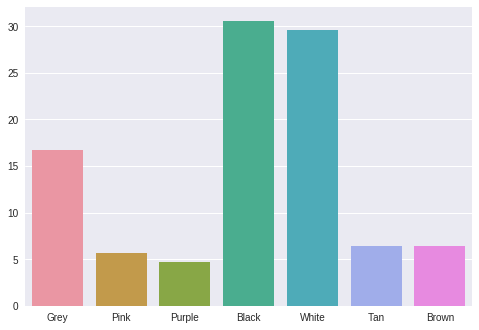

In [34]:
#Overall percentage of color across 10 Images
sns.barplot(x, y)